## 50 um Flat Fields

Flat fields for 50um slit, used for galaxy spectra.

Text(0.5, 1.0, 'Full Spectrum Columns')

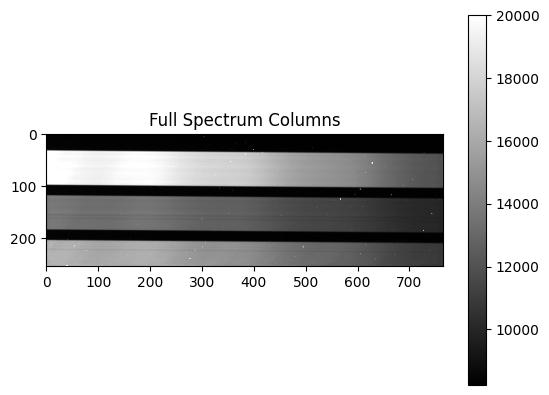

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

spectra_image = fits.open('calibrated_fits_files/flat.000.FIT')

data = spectra_image[0].data
plt.imshow(data,cmap='gray',vmax = 20000)
plt.colorbar()
plt.title('Full Spectrum Columns')

(70, 765)
53550


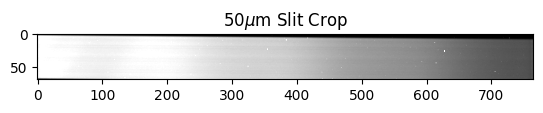

In [4]:
# Crop data to only include the top band (50um)

crop = data[30:100,:]
print(crop.shape)
plt.imshow(crop,cmap='gray',vmax = 20000)
plt.title(r'50$\mu$m Slit Crop')
print(crop.size)

In [30]:
flat_list = []

# find and open the Flat Fields and store them all in one list
file_prefix = "flat.00"
file_end = ".FIT"
pixel_data = [None]*4

for i in range(0, 4, 1):
    filename = file_prefix + str(i) + file_end
    print(filename)
    list = fits.open('../Lab_3/calibrated_fits_files/'+filename)
    image_data = list[0].data
    pixel_data[i] = image_data[30:100,:]


# open a 2d list to store median values
median_values = np.zeros((70, 765)) #the cropped image is a 125 x 765 pixel array

# run through and calculate the median value for each pixel, 125 for y-axis and 765 for x-axis
for i in range(0, 70):
    for j in range(0, 765):
        values = [pixel_data[x][i][j] for x in range(0,4)]
        median_values[i][j] = np.median(values)

flat.000.FIT
flat.001.FIT
flat.002.FIT
flat.003.FIT


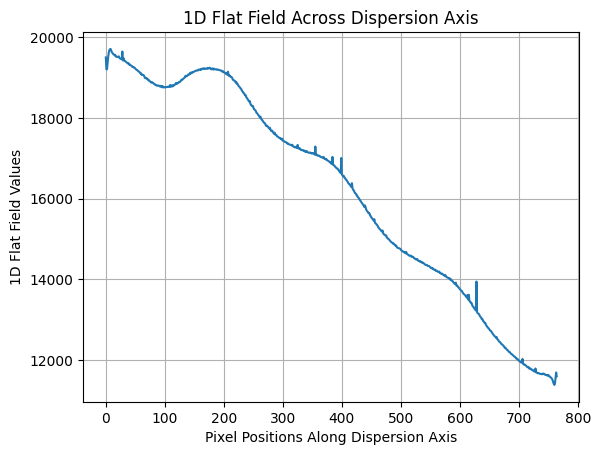

In [31]:
# Calculate the 1D flat field values by averaging along the y-axis
flat_field_1d = np.mean(median_values, axis=0)

# Plotting the 1D flat field values against pixel positions along the dispersion axis
dispersion_axis = np.arange(765) 

plt.plot(dispersion_axis, flat_field_1d)
plt.xlabel('Pixel Positions Along Dispersion Axis')
plt.ylabel('1D Flat Field Values')
plt.title('1D Flat Field Across Dispersion Axis')
plt.grid(True)
plt.show()

 [astropy.modeling.fitting]


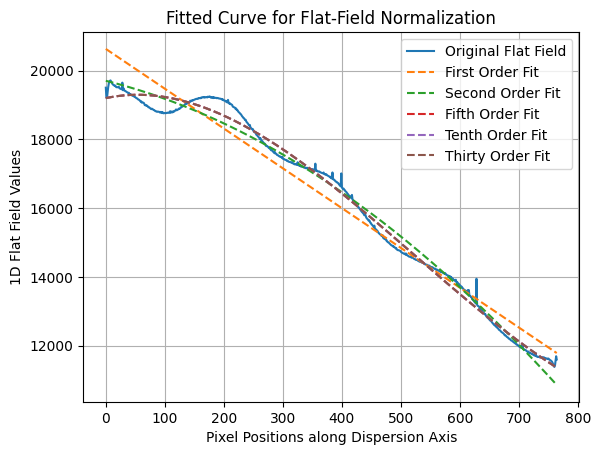

In [32]:
from astropy.modeling import models, fitting

# Pixel positions along the dispersion axis
dispersion_axis = np.arange(765)  #765 is the length of the dispersion axis

# Initialize various polynomial models for fitting
first_order = models.Polynomial1D(degree=1)
second_order = models.Polynomial1D(degree=2)
fifth_order = models.Polynomial1D(degree=5)
tenth_order = models.Polynomial1D(degree=10)
thirty_order = models.Polynomial1D(degree=30)

# Initialize a fitting algorithm
fitter = fitting.LinearLSQFitter()

# Fit the models to the 1D flat-field spectrum
first_fit = fitter(first_order, dispersion_axis, flat_field_1d)
second_fit = fitter(second_order, dispersion_axis, flat_field_1d)
fifth_fit = fitter(fifth_order, dispersion_axis, flat_field_1d)
tenth_fit = fitter(tenth_order, dispersion_axis, flat_field_1d)
thirty_fit = fitter(thirty_order, dispersion_axis, flat_field_1d)

# Generate the fits using the fitted model
first_fit_curve = first_fit(dispersion_axis)
second_fit_curve = second_fit(dispersion_axis)
fifth_fit_curve = fifth_fit(dispersion_axis)
tenth_fit_curve = tenth_fit(dispersion_axis)
thirty_fit_curve = thirty_fit(dispersion_axis)


# Plot the original flat-field and the fitted curves
plt.plot(dispersion_axis, flat_field_1d, label='Original Flat Field')
plt.plot(dispersion_axis, first_fit(dispersion_axis), label='First Order Fit', linestyle='--')
plt.plot(dispersion_axis, second_fit(dispersion_axis), label='Second Order Fit', linestyle='--')
plt.plot(dispersion_axis, fifth_fit(dispersion_axis), label='Fifth Order Fit', linestyle='--')
plt.plot(dispersion_axis, tenth_fit(dispersion_axis), label='Tenth Order Fit', linestyle='--')
plt.plot(dispersion_axis, thirty_fit(dispersion_axis), label='Thirty Order Fit', linestyle='--')

plt.xlabel('Pixel Positions along Dispersion Axis')
plt.ylabel('1D Flat Field Values')
plt.title('Fitted Curve for Flat-Field Normalization')
plt.legend()
plt.grid(True)
plt.show()

# Divide the 2D flat-field by the fits to obtain the normalized flat-field
first_normalized_flat_field = median_values / first_fit_curve
second_normalized_flat_field = median_values / second_fit_curve
fifth_normalized_flat_field = median_values / fifth_fit_curve
tenth_normalized_flat_field = median_values / tenth_fit_curve
thirty_normalized_flat_field = median_values / thirty_fit_curve

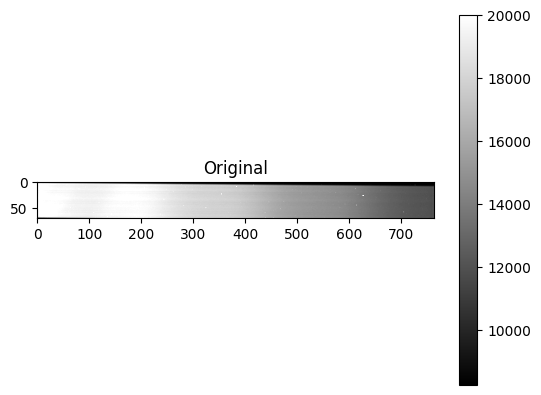

In [33]:
plt.imshow(crop,cmap='gray',vmax = 20000)
plt.title('Original')
plt.colorbar()

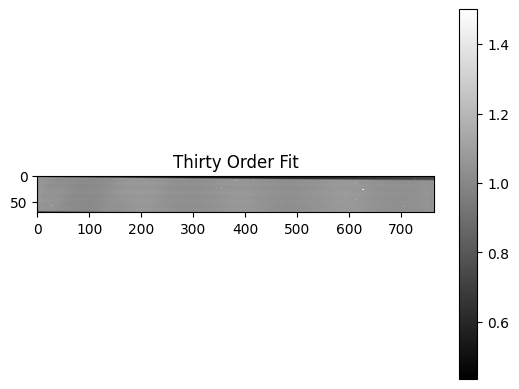

In [34]:
plt.imshow(thirty_normalized_flat_field,cmap='gray',vmax = 1.5)
plt.title('Thirty Order Fit')
plt.colorbar()

## 25 um Flat Fields

Used for Merak analysis

In [35]:
flat25_list = []

# find and open the Flat Fields and store them all in one list
file_prefix = "flat.00"
file_end = ".FIT"
pixel_data = [None]*4

for i in range(0, 4, 1):
    filename = file_prefix + str(i) + file_end
    print(filename)
    list = fits.open('../Lab_3/calibrated_fits_files/'+filename)
    image_data = list[0].data
    pixel_data[i] = image_data[110:195,:]


# open a 2d list to store median values
median25_values = np.zeros((75, 765)) #the cropped image is a 125 x 765 pixel array

# run through and calculate the median value for each pixel, 125 for y-axis and 765 for x-axis
for i in range(0, 75):
    for j in range(0, 765):
        values = [pixel_data[x][i][j] for x in range(0,4)]
        median25_values[i][j] = np.median(values)

flat.000.FIT
flat.001.FIT
flat.002.FIT
flat.003.FIT


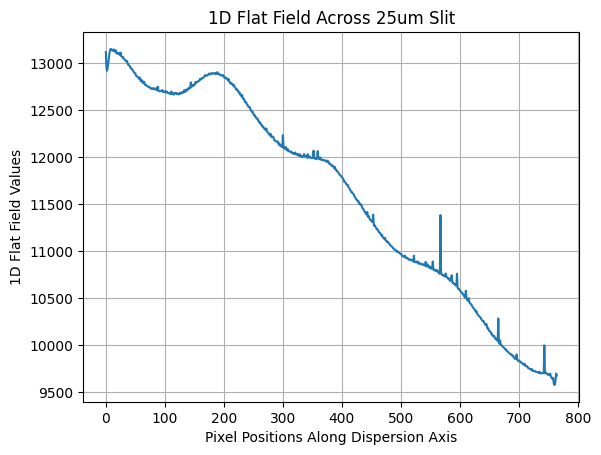

In [37]:
# Calculate the 1D flat field values by averaging along the y-axis
flat25_field_1d = np.mean(median25_values, axis=0)

# Plotting the 1D flat field values against pixel positions along the dispersion axis
dispersion_axis = np.arange(765) 

plt.plot(dispersion_axis, flat25_field_1d)
plt.xlabel('Pixel Positions Along Dispersion Axis')
plt.ylabel('1D Flat Field Values')
plt.title('1D Flat Field Across 25um Slit')
plt.grid(True)
plt.show()

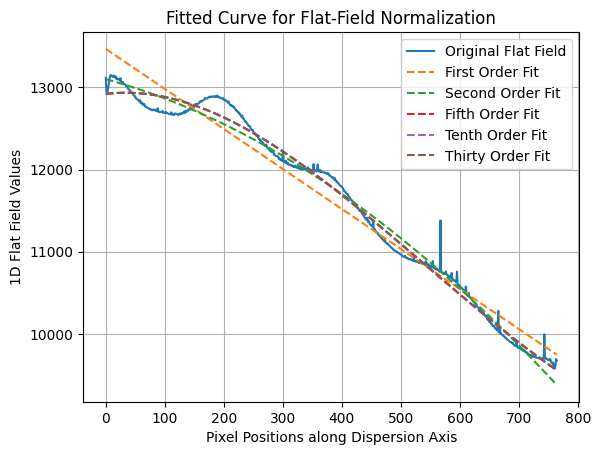

In [39]:
from astropy.modeling import models, fitting

# Pixel positions along the dispersion axis
dispersion_axis = np.arange(765)  #765 is the length of the dispersion axis

# Initialize various polynomial models for fitting
first_order = models.Polynomial1D(degree=1)
second_order = models.Polynomial1D(degree=2)
fifth_order = models.Polynomial1D(degree=5)
tenth_order = models.Polynomial1D(degree=10)
thirty_order = models.Polynomial1D(degree=30)

# Initialize a fitting algorithm
fitter = fitting.LinearLSQFitter()

# Fit the models to the 1D flat-field spectrum
first25_fit = fitter(first_order, dispersion_axis, flat25_field_1d)
second25_fit = fitter(second_order, dispersion_axis, flat25_field_1d)
fifth25_fit = fitter(fifth_order, dispersion_axis, flat25_field_1d)
tenth25_fit = fitter(tenth_order, dispersion_axis, flat25_field_1d)
thirty25_fit = fitter(thirty_order, dispersion_axis, flat25_field_1d)

# Generate the fits using the fitted model
first25_fit_curve = first25_fit(dispersion_axis)
second25_fit_curve = second25_fit(dispersion_axis)
fifth25_fit_curve = fifth25_fit(dispersion_axis)
tenth25_fit_curve = tenth25_fit(dispersion_axis)
thirty25_fit_curve = thirty25_fit(dispersion_axis)


# Plot the original flat-field and the fitted curves
plt.plot(dispersion_axis, flat25_field_1d, label='Original Flat Field')
plt.plot(dispersion_axis, first25_fit(dispersion_axis), label='First Order Fit', linestyle='--')
plt.plot(dispersion_axis, second25_fit(dispersion_axis), label='Second Order Fit', linestyle='--')
plt.plot(dispersion_axis, fifth25_fit(dispersion_axis), label='Fifth Order Fit', linestyle='--')
plt.plot(dispersion_axis, tenth25_fit(dispersion_axis), label='Tenth Order Fit', linestyle='--')
plt.plot(dispersion_axis, thirty25_fit(dispersion_axis), label='Thirty Order Fit', linestyle='--')

plt.xlabel('Pixel Positions along Dispersion Axis')
plt.ylabel('1D Flat Field Values')
plt.title('Fitted Curve for Flat-Field Normalization')
plt.legend()
plt.grid(True)
plt.show()

# Divide the 2D flat-field by the fits to obtain the normalized flat-field
first25_normalized_flat_field = median25_values / first25_fit_curve
second25_normalized_flat_field = median25_values / second25_fit_curve
fifth25_normalized_flat_field = median25_values / fifth25_fit_curve
tenth25_normalized_flat_field = median25_values / tenth25_fit_curve
thirty25_normalized_flat_field = median25_values / thirty25_fit_curve

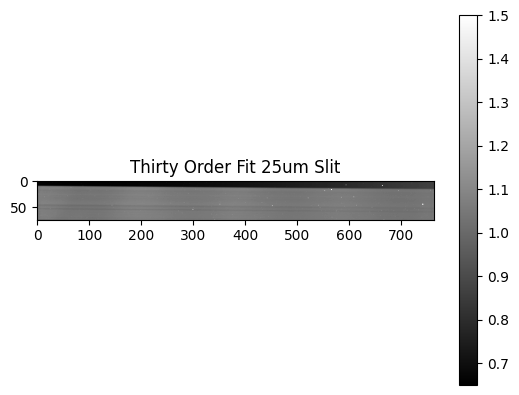

In [42]:
plt.imshow(thirty25_normalized_flat_field,cmap='gray',vmax=1.5)
plt.title('Thirty Order Fit 25um Slit')
plt.colorbar()

## Arc Lamp

Below is the full arc lamp spectra:

Text(0.5, 1.0, 'Arc Lamp Spectra')

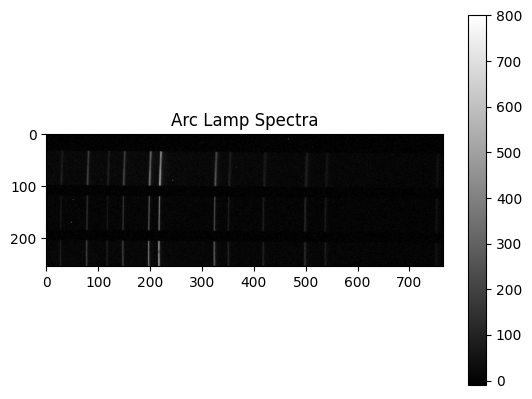

In [10]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

spectra = fits.open('calibrated_fits_files/neon.000.FIT')

spectra_data = spectra[0].data 
plt.imshow(spectra_data,cmap='gray',vmin = -10, vmax = 800)
plt.colorbar()
plt.title('Arc Lamp Spectra')

Taking the top row, which corresponds to the 50um slit, and applying the normalized flat field:

(70, 765)


Text(0.5, 1.0, 'Crop of 50$\\mu$m Slit')

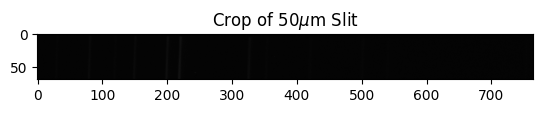

In [11]:
spectra_crop = spectra_data[30:100,:]
print(spectra_crop.shape)
plt.imshow(spectra_crop,cmap='gray',vmax=8800)
plt.title(r'Crop of 50$\mu$m Slit')


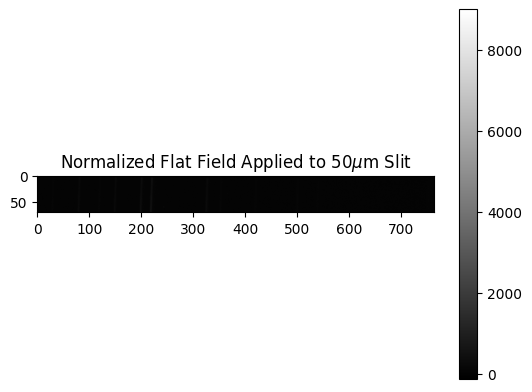

In [138]:
#Apply normalized flat field to arc lamp spectrum using the first order fit
normal = spectra_crop / thirty_normalized_flat_field

plt.imshow(normal,cmap='gray',vmax= 9000)
plt.title(r'Normalized Flat Field Applied to 50$\mu$m Slit')
plt.colorbar()

## Dispersion Axis: Pixel --> Wavelength

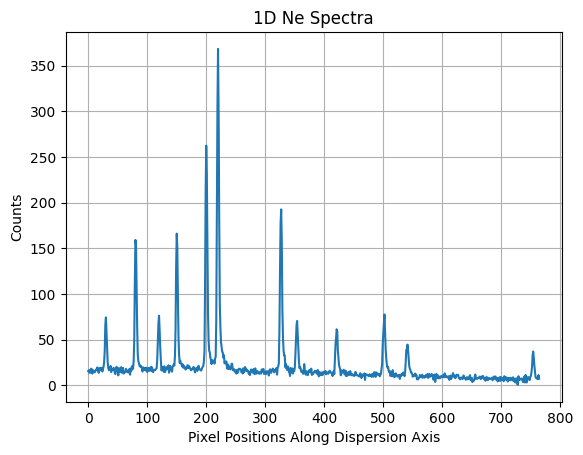

In [139]:
# Calculate the 1D spectra by averaging along the y-axis
flat_field = np.mean(normal, axis=0)

# Plot the 1D pixel counts against pixel positions along the dispersion axis
dispersion_axis = np.arange(765) 

plt.plot(dispersion_axis, flat_field)
plt.xlabel('Pixel Positions Along Dispersion Axis')
plt.ylabel('Counts')
plt.title('1D Ne Spectra')
plt.grid(True)
plt.show()

13
13
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 1
Parameters:
           c0                c1        
    ---------------- ------------------
    6186.70633436767 0.9818942079330724


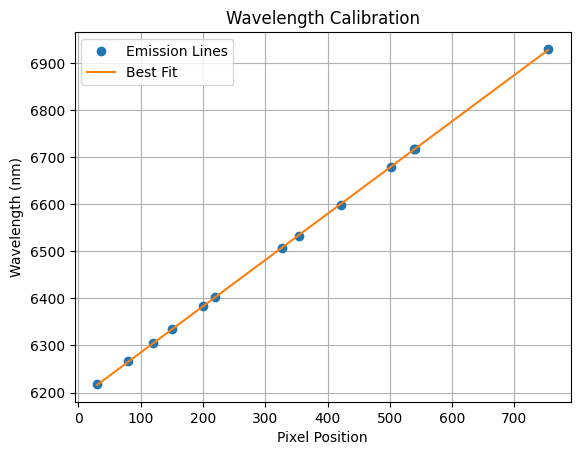

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from astropy.modeling import models, fitting

# Find peaks corresponding to known_wavelengths
peaks, _ = find_peaks(flat_field, height=35)

# Define the pixel positions of identified peaks
pixel_positions = peaks
print(len(pixel_positions))

# Known Neon spectrum emission lines provied by https://www.atomtrace.com/elements-database/element/10
known_wavelengths = [6217.28, 6266.49, 6304.79, 6334.43, 6382.99, 6402.25, 6506.53, 6532.88, 6598.95, 6678.28, 6717.04, 6717.07, 6929.47]
print(len(known_wavelengths))
    
# Define the model for fitting
linear_model = models.Polynomial1D(degree=1)

# Perform the fitting
fitter = fitting.LinearLSQFitter()
best_fit = fitter(linear_model, pixel_positions, known_wavelengths)

# Plot the data and the best-fit line
plt.plot(pixel_positions, known_wavelengths, 'o', label='Emission Lines')
plt.plot(pixel_positions, best_fit(pixel_positions), label='Best Fit')
plt.xlabel('Pixel Position')
plt.ylabel('Wavelength (nm)')
plt.title('Wavelength Calibration')
plt.grid(True)
plt.legend()

# Display the fit parameters
print(best_fit)
plt.show()


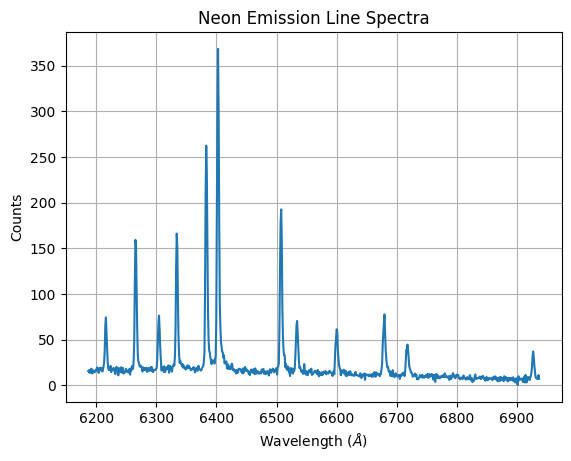

In [141]:
# Using best fit equation, adjust x-axis from pixels to nm
pixels = np.arange(765) 
wavelength_axis = 6186.70633436767 + 0.9818942079330724*pixels

plt.plot(wavelength_axis, flat_field)
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel('Counts')
plt.title('Neon Emission Line Spectra')

#Add labels for stronger emission lines
#plt.text(584,530,'588nm',color='red',alpha=1.0,fontsize=9.5)


plt.grid(True)
plt.show()

## Merak

Text(0.5, 1.0, 'Merak Spectra')

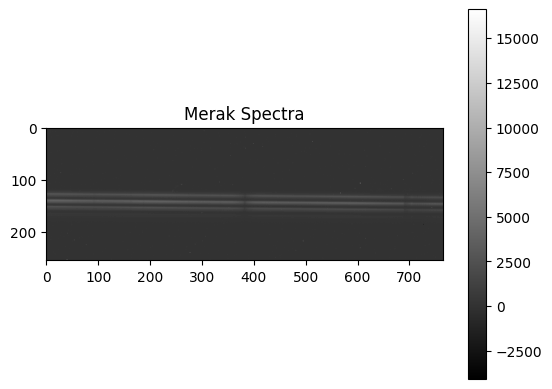

In [55]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

#One of the Merak FITS
merak_spec = fits.open('calibrated_fits_files/merak_mean.000.FIT',vmin = -10, vmax = 100)

merak_spec_data = merak_spec[0].data 
plt.imshow(merak_spec_data,cmap='gray')
plt.colorbar()
plt.title('Merak Spectra')

(70, 765)
53550


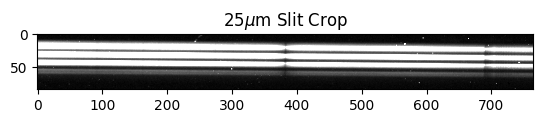

In [50]:
#Crop data to only include the middle band (25um)

merak_crop = merak_spec_data[110:195,:]
print(crop.shape)
plt.imshow(merak_crop,cmap='gray',vmin = -10, vmax = 1000)
plt.title(r'25$\mu$m Slit Crop')
print(crop.size)

In [46]:
merak_data = []

# find and open the Flat Fields and store them all in one list
file_prefix = "merak_mean.00"
file_end = ".FIT"
pixel_data = [None]*5

for i in range(0, 5):
    filename = file_prefix + str(i) + file_end
    print(filename, i)
    list = fits.open('../Lab_3/calibrated_fits_files/'+filename)
    image_data = list[0].data
    pixel_data[i] = image_data[110:195,:]


# open a 2d list to store median values
merak_median_values = np.zeros((75, 765)) #the cropped image is a 125 x 765 pixel array

# run through and calculate the median value for each pixel, 125 for y-axis and 765 for x-axis
for i in range(0, 75):
    for j in range(0, 765):
        values = [pixel_data[x][i][j] for x in range(0,5)]
        merak_median_values[i][j] = np.median(values)

merak_mean.000.FIT 0
merak_mean.001.FIT 1
merak_mean.002.FIT 2
merak_mean.003.FIT 3
merak_mean.004.FIT 4


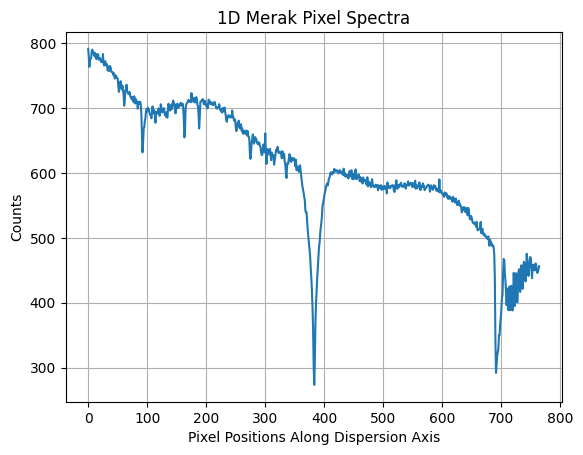

In [49]:
#Apply normalized flat field to arc lamp spectrum using the first order fit
science_merak = merak_median_values / thirty25_normalized_flat_field

# Calculate the 1D spectra by averaging along the y-axis
merak_tot = np.mean(science_merak, axis=0)

# Plot the 1D pixel counts against pixel positions along the dispersion axis
dispersion_axis = np.arange(765) 

plt.plot(dispersion_axis, merak_tot)
plt.xlabel('Pixel Positions Along Dispersion Axis')
plt.ylabel('Counts')
plt.title('1D Merak Pixel Spectra')
plt.grid(True)
plt.show()

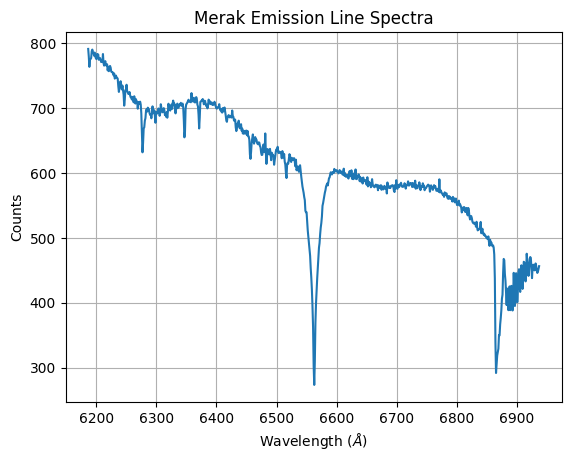

In [48]:
# Using best fit equation, adjust x-axis from pixels to nm
pixels = np.arange(765) 
wavelength_axis = 6186.70633436767 + 0.9818942079330724*pixels

plt.plot(wavelength_axis, merak_tot)
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel('Counts')
plt.title('Merak Emission Line Spectra')

#Add labels for stronger emission lines
#plt.text(584,530,'588nm',color='red',alpha=1.0,fontsize=9.5)


plt.grid(True)
plt.show()

/var/folders/74/9yc0dt9d53z15d2qpmgpxv4h0000gn/T/ipykernel_14158/4226622719.py:22: RuntimeWarning: overflow encountered in exp
  ans = a/((wl**5)*(np.exp(b)-1.))


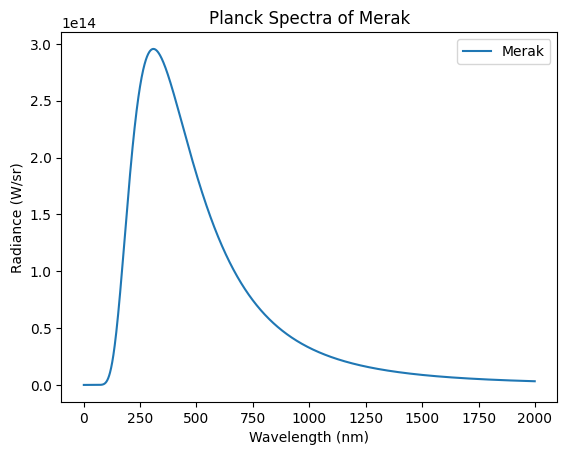

In [115]:
#Some old code I made a while ago for fun, see https://github.com/brady-ryan/planck_spectrum

import numpy as np
import matplotlib.pyplot as plt

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23
i = 620
j = 700

class Planck:

    def __init__(self,T,name):
        self.T = T
        self.name = name
        self.wls = np.arange(1e-9, 2e-6, 1e-9)

    def B(self,wl,T):
        a = 2.*h*c**2
        b = (h*c)/(wl*k*T)
        ans = a/((wl**5)*(np.exp(b)-1.))
        return ans
    
    def plot(self):
        xs = self.wls*1e9
        ys = self.B(self.wls,self.T)
        plt.plot(xs,ys,label=f'{self.name}')
        plt.ylabel(r"Radiance (W/sr)")
        plt.xlabel(r"Wavelength (nm)")
        plt.title(r"Planck Spectra of Merak")
        #plt.legend()

    def crop_plot(self):
        xs = self.wls*1e9
        ys = self.B(self.wls,self.T)
        x_bound = xs[i:j] * 10
        y_bound = ys[i:j] * 10
        return x_bound, y_bound

 
merak = Planck(9377,'Merak')

merak.plot()

xcrop, ycrop = merak.crop_plot()


plt.legend()
plt.show()

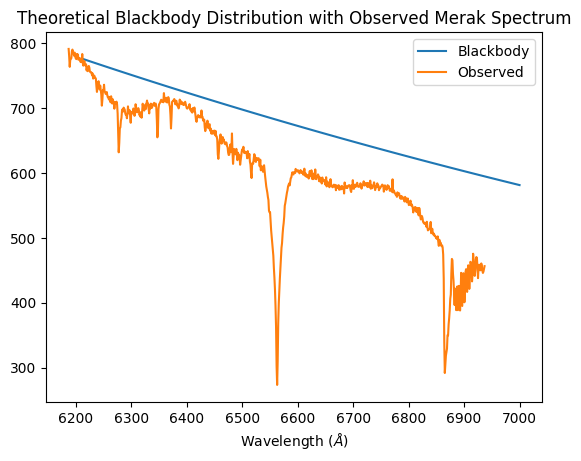

In [152]:
#Comparing the Merak spectra with the theoretical Planck spectra

s = 1.53e12

plt.plot(xcrop,ycrop/s,label='Blackbody')
plt.plot(wavelength_axis, merak_tot,label='Observed')
plt.xlabel(r'Wavelength ($\AA$)')
plt.title('Theoretical Blackbody Distribution with Observed Merak Spectrum')
plt.legend()

## Sky

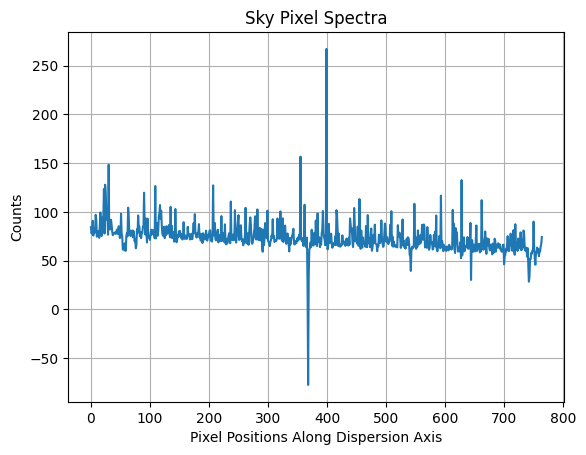

In [80]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

#One of the sky FITS
sky_spec = fits.open('calibrated_fits_files/sky_mean.000.FIT')

sky_spec_data = sky_spec[0].data 

sky_crop = sky_spec_data[30:100,:]

#Apply normalized flat field to arc lamp spectrum using the first order fit
science_sky = sky_crop / thirty_normalized_flat_field

# Calculate the 1D spectra by averaging along the y-axis
m51_tot = np.mean(science_sky, axis=0)

# Plot the 1D pixel counts against pixel positions along the dispersion axis
dispersion_axis = np.arange(765) 

plt.plot(dispersion_axis, m51_tot)
plt.xlabel('Pixel Positions Along Dispersion Axis')
plt.ylabel('Counts')
plt.title('Sky Pixel Spectra')
plt.grid(True)
plt.show()


## M51

Text(0.5, 1.0, 'M51 Spectra')

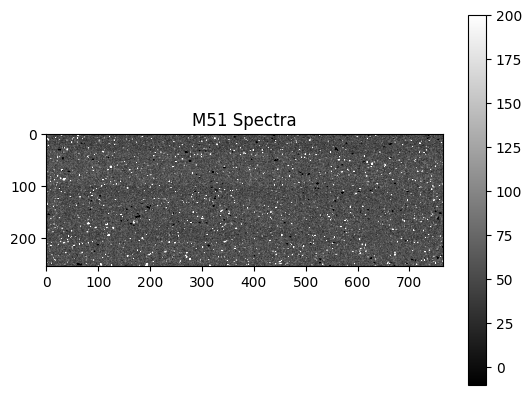

In [66]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

#One of the M51 FITS
m51_spec = fits.open('calibrated_fits_files/m51_mean.001.FIT')

m51_spec_data = m51_spec[0].data 

plt.imshow(m51_spec_data[0],cmap='gray', vmin=-10,vmax=200)
plt.colorbar()
plt.title('M51 Spectra')

(70, 765)
53550


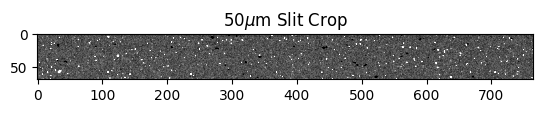

In [74]:
#Crop data to only include the top band (50um)

m51_crop = m51_spec_data[0][30:100,:]
print(crop.shape)
plt.imshow(m51_crop,cmap='gray', vmin=-10,vmax=200)
plt.title(r'50$\mu$m Slit Crop')
print(crop.size)

In [76]:
m51_data = []

# find and open the Flat Fields and store them all in one list
file_prefix = "m51_med.00"
file_end = ".FIT"
pixel_data = [None]*4

for i in range(1, 4):
    filename = file_prefix + str(i) + file_end
    print(filename, i)
    list = fits.open('../Lab_3/calibrated_fits_files/'+filename)
    image_data = list[0].data
    pixel_data[i] = image_data[0][30:100,:]


# open a 2d list to store median values
m51_median_values = np.zeros((70, 765)) #the cropped image is a 125 x 765 pixel array

# run through and calculate the median value for each pixel, 125 for y-axis and 765 for x-axis
for i in range(0, 70):
    for j in range(0, 765):
        values = [pixel_data[x][i][j] for x in range(1,4)]
        m51_median_values[i][j] = np.mean(values)

m51_med.001.FIT 1
m51_med.002.FIT 2
m51_med.003.FIT 3


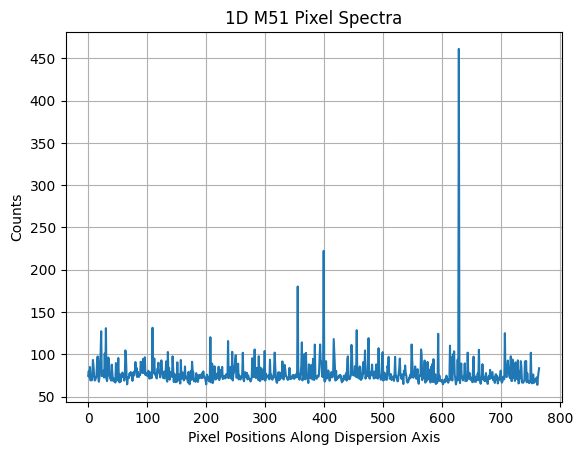

In [77]:
#Apply normalized flat field to arc lamp spectrum using the first order fit
science_m51 = m51_median_values / thirty_normalized_flat_field

# Calculate the 1D spectra by averaging along the y-axis
m51_tot = np.mean(science_m51, axis=0)

# Plot the 1D pixel counts against pixel positions along the dispersion axis
dispersion_axis = np.arange(765) 

plt.plot(dispersion_axis, m51_tot)
plt.xlabel('Pixel Positions Along Dispersion Axis')
plt.ylabel('Counts')
plt.title('1D M51 Pixel Spectra')
plt.grid(True)
plt.show()

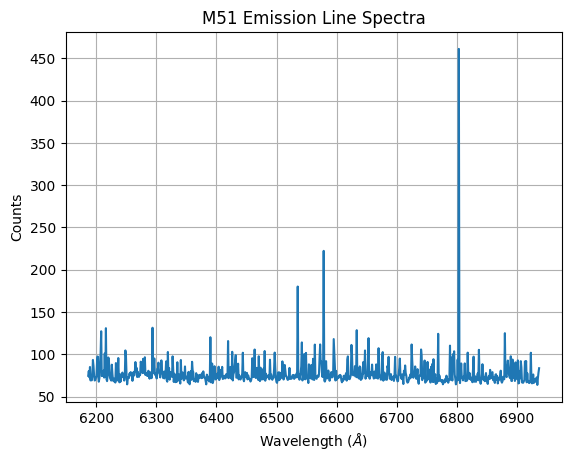

In [78]:
# Using best fit equation, adjust x-axis from pixels to nm
pixels = np.arange(765) 
wavelength_axis = 6186.70633436767 + 0.9818942079330724*pixels

plt.plot(wavelength_axis, m51_tot)
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel('Counts')
plt.title('M51 Emission Line Spectra')

#Add labels for stronger emission lines
#plt.text(584,530,'588nm',color='red',alpha=1.0,fontsize=9.5)


plt.grid(True)
plt.show()

## M82

Text(0.5, 1.0, 'M82')

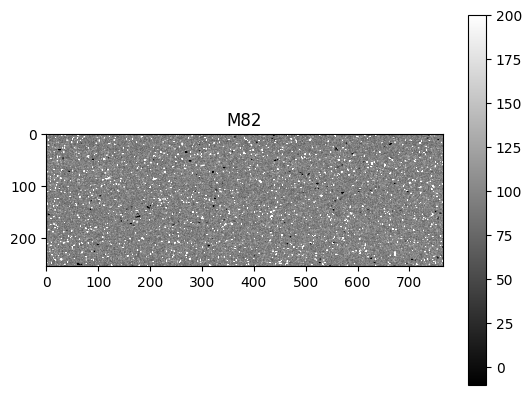

In [81]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

#One of the M82 FITS
m82_spec = fits.open('calibrated_fits_files/m82_mean.000.FIT')

m82_spec_data = m82_spec[0].data 
plt.imshow(m82_spec_data[0],cmap='gray', vmin = -10, vmax = 200)
plt.colorbar()
plt.title('M82')

In [82]:
m82_data = []

# find and open the Flat Fields and store them all in one list
file_prefix = "m82_mean.00"
file_end = ".FIT"
pixel_data = [None]*3

for i in range(0, 3):
    filename = file_prefix + str(i) + file_end
    print(filename, i)
    list = fits.open('../Lab_3/calibrated_fits_files/'+filename)
    image_data = list[0].data
    pixel_data[i] = image_data[0][30:100,:]


# open a 2d list to store median values
m82_median_values = np.zeros((70, 765)) #the cropped image is a 125 x 765 pixel array

# run through and calculate the median value for each pixel, 125 for y-axis and 765 for x-axis
for i in range(0, 70):
    for j in range(0, 765):
        values = [pixel_data[x][i][j] for x in range(0,3)]
        m82_median_values[i][j] = np.median(values)

m82_mean.000.FIT 0
m82_mean.001.FIT 1
m82_mean.002.FIT 2


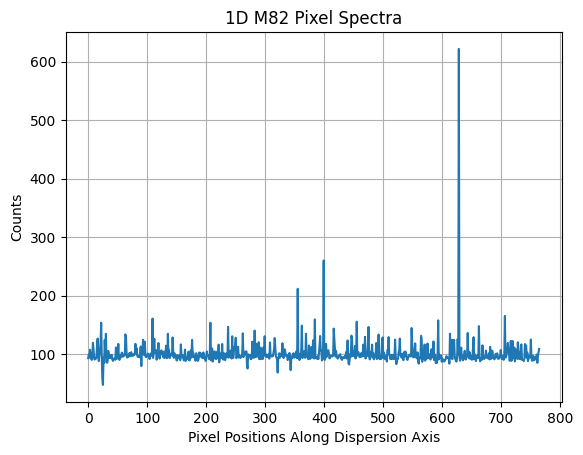

In [83]:
#Apply normalized flat field to arc lamp spectrum using the first order fit
science_m82 = m82_median_values / thirty_normalized_flat_field

# Calculate the 1D spectra by averaging along the y-axis
m82_tot = np.mean(science_m82, axis=0)

# Plot the 1D pixel counts against pixel positions along the dispersion axis
dispersion_axis = np.arange(765) 

plt.plot(dispersion_axis, m82_tot)
plt.xlabel('Pixel Positions Along Dispersion Axis')
plt.ylabel('Counts')
plt.title('1D M82 Pixel Spectra')
plt.grid(True)
plt.show()

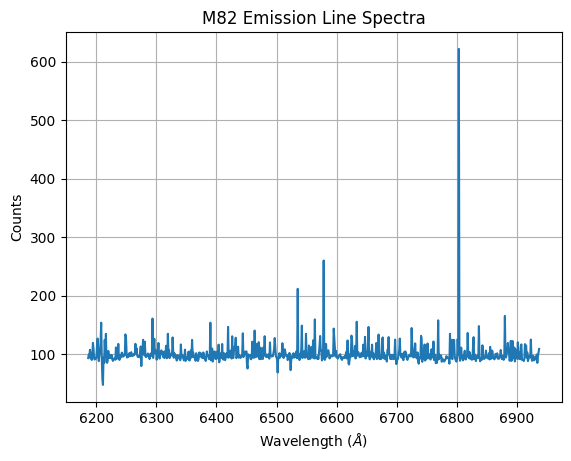

In [84]:
# Using best fit equation, adjust x-axis from pixels to nm
pixels = np.arange(765) 
wavelength_axis = 6186.70633436767 + 0.9818942079330724*pixels

plt.plot(wavelength_axis, m82_tot)
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel('Counts')
plt.title('M82 Emission Line Spectra')

#Add labels for stronger emission lines
#plt.text(584,530,'588nm',color='red',alpha=1.0,fontsize=9.5)


plt.grid(True)
plt.show()